In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
# Untuk baca Dataset_Temp - sheet 1
df = pd.read_excel("dataset_market_basket.xlsx",sheet_name="Sheet1")
df

In [ ]:
# 1 Item set
df.sum()

In [ ]:
# Melihat nama nama kolom yang ada dalam data market
df.columns

In [ ]:
# 2 Item set
from itertools import permutations #Library untuk buat kombinasi barang

# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

In [ ]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

In [ ]:
# Menghitung banyaknya data pada setiap kombinasi
hitung = {} #Mengganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

In [ ]:
# List support
# supp = [i/len(df)*100 for i in hitung.values()]
# print(supp)


print("--Nilai Support--")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

In [ ]:
# List Confidence
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("--Nilai Confidence--")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

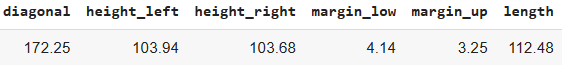
<!-- 1412 -->

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

In [ ]:
df = pd.read_csv("deteksi_uang_palsu.csv")
df

## Membuat tabel jarak

In [ ]:
# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df['distance'] = np.sqrt(
    (df['diagonal'] - new_data['diagonal'].values[0])**2
    + (df['height_left'] - new_data['height_left'].values[0])**2
    + (df['height_right'] - new_data['height_right'].values[0])**2
    + (df['margin_low'] - new_data['margin_low'].values[0])**2
    + (df['margin_up'] - new_data['margin_up'].values[0])**2
    + (df['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


## Menambahkan kolom jarak

In [ ]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

## Mengurutkan data dari yang terkecil ke yang terbesar

In [ ]:
# Mengurutkan data dari kecil ke besar
sorted_data = df.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df)))

# Menentukan data terdekat
data_terdekat = sorted_data.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


## Menentukan hasil prediksi berdasarkan label terbanyak

In [ ]:
print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df.drop(columns=['is_genuine','distance'],axis=1)
y_train = df['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

# (3) Analisis

> Nama : Windy Widyastutik

> Nim : 2109116014


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

Tema : Pendidikan

Judul Data : Passing Grade UTBK in Science Major

Sumber : https://www.kaggle.com/datasets/rezkyyayang/passing-grade-utbk-in-science-major

## Bussines Understanding


Passing Grade UTBK in Science Major Dataset merupakan kumpulan data yang berisi informasi tentang Lulus Nilai UTBK Jurusan IPA. Dataset ini mencakup informasi tentang jenis kelamin siswa, kelompok atau kategori siswa, status ekonomi sosial, tingkat pendidikan orang tua, persiapan ujian, nilai matematika, nilai membaca dan nilai menulis.

Tujuan dari dataset ini adalah untuk mengenal lebih jauh mengenai data yang diamati, atau dalam kata lain bagaimana kita mencari tahu karakteristik dari data tersebut dan untuk mengenal lebih jauh mengenai data yang diamati, atau dalam kata lain bagaimana kita mencari tahu karakteristik dari data tersebut. 

## Data Understanding

### Collect Data

Sumber Data : https://www.kaggle.com/datasets/rezkyyayang/passing-grade-utbk-in-science-major

### Penjelasan Kolom

1. Gender : jenis kelamin siswa (kategori : male dan female)
2. Race/ethnicity : kelompok siswa (kategori : group A, group B, group C, group D, dan group E)
3. Parental level of education: tingkat pendidikan orang tua (kategori : bachelor's degree, some college, master's degree, associate's degree, high school, dan some high school)
4. Lunch : status ekonomi sosial (kategori : standard, dan free/reduced)
5. Test preparation course : persiapan ujian (kategori : completed, none)
6. Math score : Merupakan variabel numerik yang menunjukkan skor matematika.
7. Reading score : Merupakan variabel numerik yang menunjukkan skor membaca.
8. Writing score : Merupakan variabel numerik yang menunjukkan skor menulis.





In [ ]:
df2 = pd.read_csv('stud_perf_exam.csv')
df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df2.info()

In [ ]:
df2.describe()

In [ ]:
sns.heatmap(
    df2[['math score', 'reading score', 'writing score']].corr(),
    annot=True,
    center=0,
);
plt.title('Heatmap untuk Setiap variabel numerik')
plt.show()

#### Visualisasi Comparison


In [ ]:
# Visualisasi yang menampilkan berapa banyak gender berdasarkan race/ethnicity
sns.countplot(data=df2,x="race/ethnicity",hue="gender")

In [ ]:
# Visualisasi yang menampilkan berapa banyak parental level of education berdasarkan kategorinya
sns.countplot(data=df2,y="parental level of education")

In [ ]:
# Buatlah visualisasi yang menampilkan berapa banyak parental level of education berdasarkan race/ethnicity
sns.countplot(data=df2, y='parental level of education', hue="race/ethnicity");

#### Visualisasi Distribution

In [ ]:
# Histogram untuk math score
sns.histplot(data=df2, x="math score", kde=True)

In [ ]:
# Boxplot untuk math score
sns.boxplot(data=df2,x="math score")

#### Visualisasi Reletionship

<Axes: xlabel='race/ethnicity', ylabel='math score'>

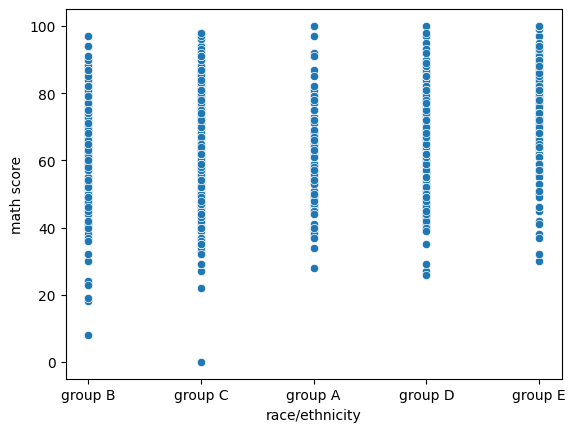

In [ ]:
# Scatterplot untuk date dan acc_confirmed
sns.scatterplot(data=df2,x="race/ethnicity",y="math score")

#### Visualisasi Composition

In [ ]:
# Pieplot untuk race/ethnicity
px.pie(df2,names="race/ethnicity")

## Data Preparation

##### Cleaning Data

In [ ]:
df2.isna().sum()

math score                                        0
reading score                                     0
writing score                                     0
gender_female                                     0
gender_male                                       0
race/ethnicity_group A                            0
race/ethnicity_group B                            0
race/ethnicity_group C                            0
race/ethnicity_group D                            0
race/ethnicity_group E                            0
parental level of education_associate's degree    0
parental level of education_bachelor's degree     0
parental level of education_high school           0
parental level of education_master's degree       0
parental level of education_some college          0
parental level of education_some high school      0
lunch_free/reduced                                0
lunch_standard                                    0
test preparation course_completed                 0
test prepara

##### Transform Data

In [ ]:
df2 = pd.get_dummies(df2)
print(df2)

     math score  reading score  writing score  gender_female  gender_male  race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  \
0            72             72             74              1            0                       0                       1                       0                       0                       0   
1            69             90             88              1            0                       0                       0                       1                       0                       0   
2            90             95             93              1            0                       0                       1                       0                       0                       0   
3            47             57             44              0            1                       1                       0                       0                       0                       0   
4            76

##### Split Data

In [ ]:
from sklearn.model_selection import train_test_split
x = df2.drop('reading score',axis=1)
y = df2['reading score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)

     math score  writing score  gender_female  gender_male  race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  \
541          79             80              0            1                       0                       0                       0                       1                       0   
440          67             79              1            0                       0                       0                       1                       0                       0   
482          68             61              0            1                       0                       0                       1                       0                       0   
422          47             67              1            0                       0                       0                       0                       1                       0   
778          72             82              1            0                       1        